# CONTOUR MASKING

using [hull of] biggest contour

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
def closeCnt(image2close):
    kernel = np.ones((25,25),np.uint8)#cv.getStructuringElement(cv.MORPH_RECT,(10,10)) 
    image2close=cv.morphologyEx(image2close,cv.MORPH_CLOSE,kernel)
    image2close=cv.morphologyEx(image2close,cv.MORPH_RECT,kernel)
    kernel =cv.getStructuringElement(cv.MORPH_RECT,(10,10))
    image2close=cv.dilate(image2close,kernel,iterations=2)
    kernel = np.ones((15,15),np.uint8)
    image2close=cv.morphologyEx(image2close,cv.MORPH_OPEN,kernel)
    return image2close

def roiHud(image2hud,cnt2hud,hull2hud):
    # draw max contour
    cv.drawContours(image2hud, cnt2hud, -1,(25,205,255), 10)
    
    # draw convex hull
    cv.drawContours(image2hud, [hull2hud], -1, (255, 255, 0), 5)

    # rotated rect 
    rect = cv.minAreaRect(cnt2hud)
    box = np.int0(cv.boxPoints(rect))
    cv.drawContours(image2hud, [box], 0, (0,0,255), 8)

    # bounding rect and center
    xR,yR,wR,hR = cv.boundingRect(cnt2hud)
    cv.rectangle(image2hud, (xR,yR), (xR+wR,yR+hR), (255,0,255), 15)

    # rectangle center
    xcR,ycR=xR+wR//2, yR+hR//2
    cv.circle(image2hud, (xcR,ycR), 15, (0,255,0), 18)
    
    return image2hud, (xcR, ycR)

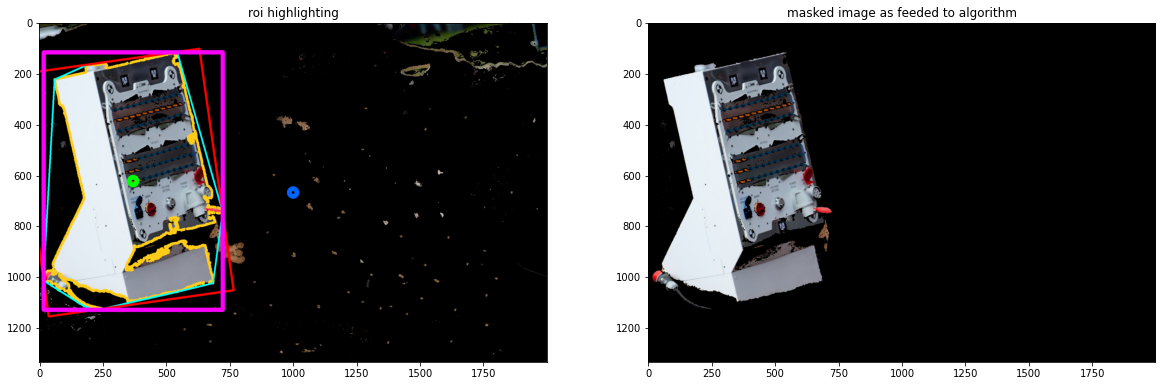

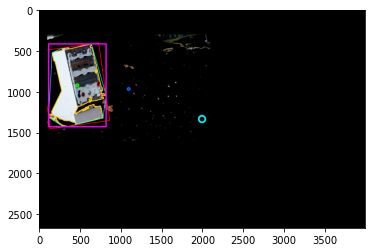

moving


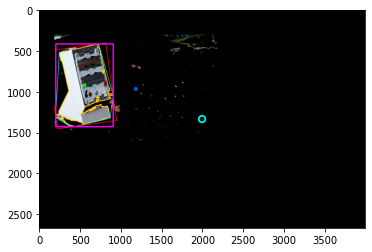

moving


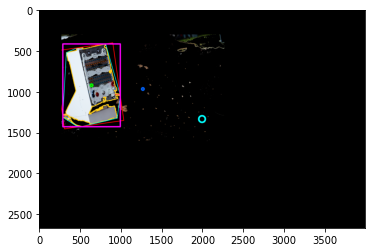

moving


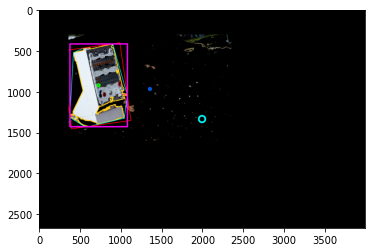

moving


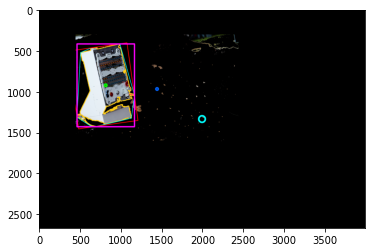

moving


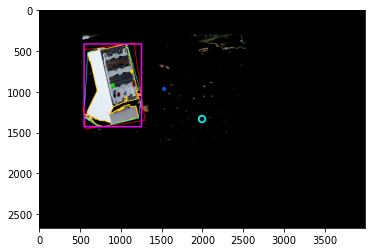

moving


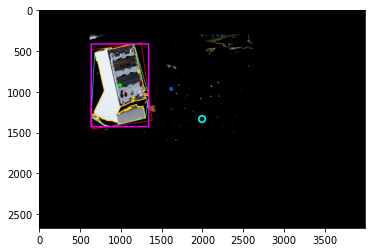

moving


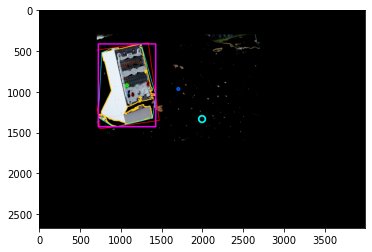

moving


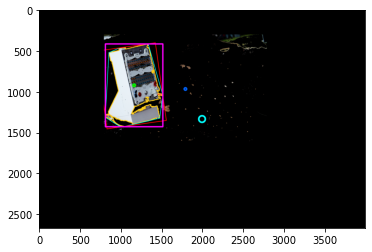

moving


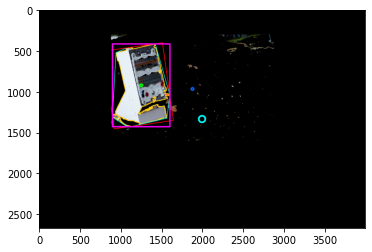

moving


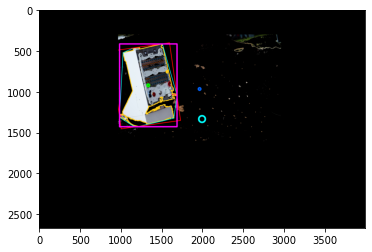

moving


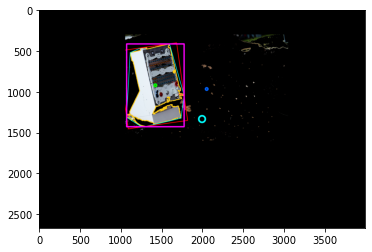

moving


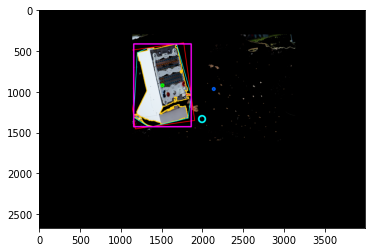

moving


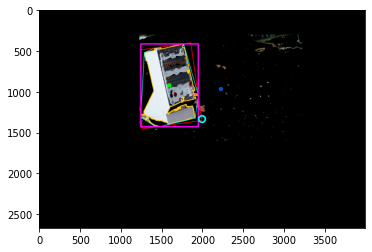

moving


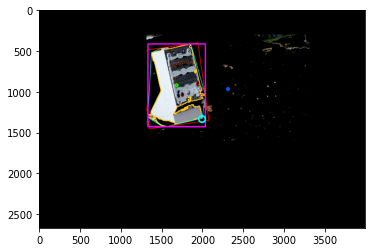

moving


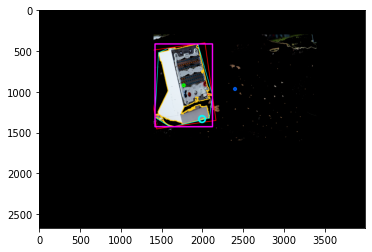

moving


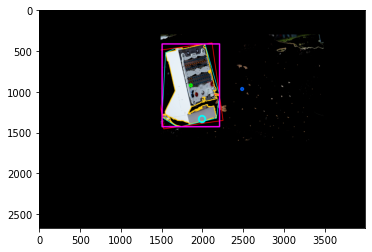

moving


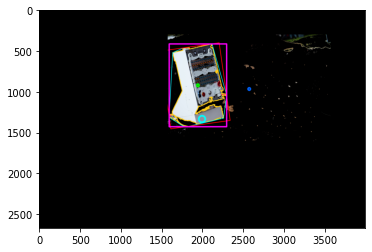

moving


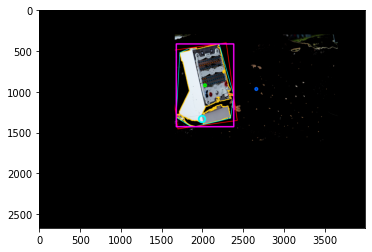

moving


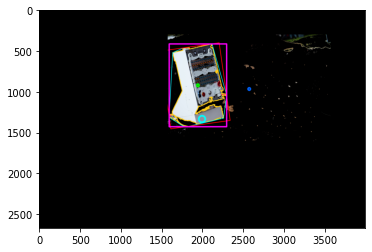

moving
oscilaltions!speed reduction


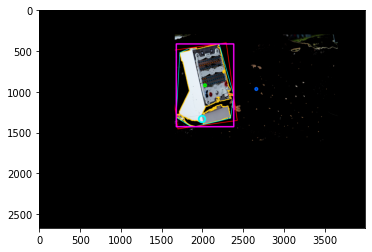

moving


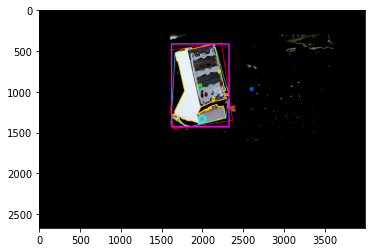

moving
oscilaltions!speed reduction


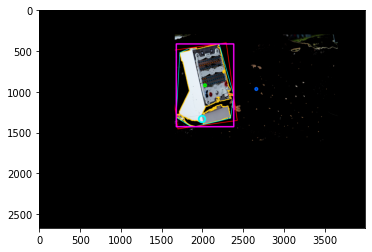

moving


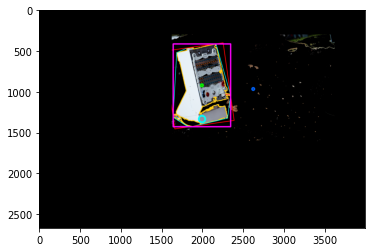

terminating motion...
terminated


In [29]:
  
##result of previous code coventiently modified as if robot not present
foreground=cv.imread('../../images/panel/paneltask_real.jpg')
#foreground=bgForeImprov(foreground)

# foreground grayscaling and binarization
imgcnts = cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)
#imgtrack = cv.threshold(bpMask,10,255,0)#, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
imgcnts[imgcnts<10]=0
imgcnts[imgcnts>=10]=255

#imgcnts=cv.Canny(imgcnts,120,60)
# close max contour
#imgcnts=closeCnt(imgcnts)
# contours
cnts = cv.findContours(imgcnts, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# max contour, hull and hullmask
#maxcnt=max(cnts, key=lambda x: cv.contourArea(x)) #len)
maxcnt=max(cnts, key=len)
hullmax=cv.convexHull(maxcnt)
foreprint=foreground.copy()
hullMask=cv.cvtColor(cv.fillConvexPoly(np.zeros(foreprint.shape,np.uint8),hullmax,255),cv.COLOR_BGR2GRAY)

# masked foreground image
foreprint=cv.bitwise_and(foreprint,foreprint,mask=hullMask)

# image with roi highlight and center
forehud,cR=roiHud(foreground.copy(),maxcnt,hullmax)



# MOTION CONTROL SIMULATION

https://stackoverflow.com/questions/743164/how-to-emulate-a-do-while-loop-in-python



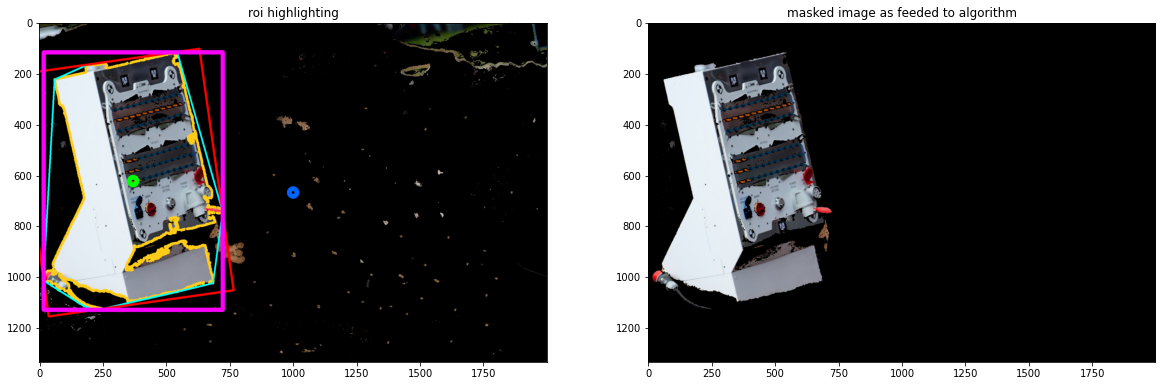

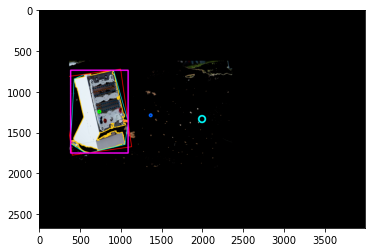

moving


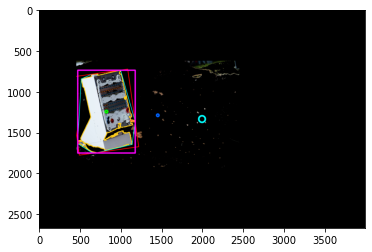

moving


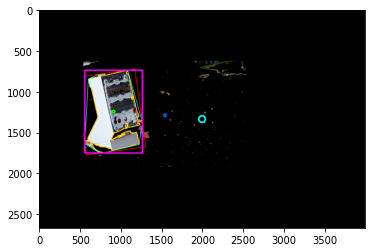

moving


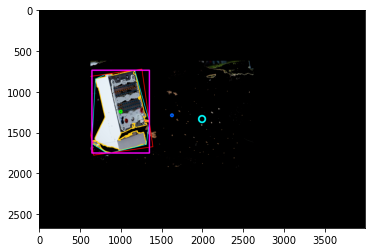

moving


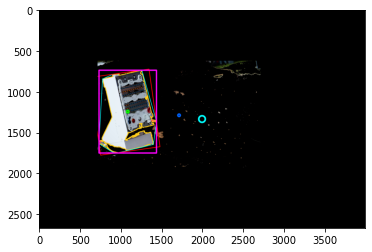

moving


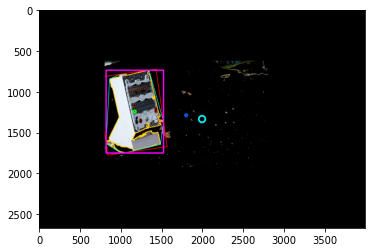

moving


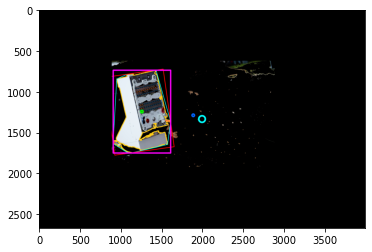

moving


KeyboardInterrupt: 

In [33]:
xcR,ycR=cR
# image center and driving direction
yCI=foreground.shape[0]//2
xCI=foreground.shape[1]//2
cv.circle(forehud, (xCI, yCI), 15, (255,100,0), 18)
xDelta,yDelta=-(xCI-xcR),yCI-ycR

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(forehud,cv.COLOR_BGR2RGB))
plt.title('roi highlighting')
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(foreprint,cv.COLOR_BGR2RGB))
plt.title('masked image as feeded to algorithm')
plt.show()


# rotation termination criterion: distance xDelta< epsROT
epsROT=10 #pixels
# advance ter.crit.: dimension hR>hRmax
hRmax=0.75*foreground.shape[0]


# foreground ROI and roi center

roo=rooy,roox=100,2000#how ot define this? can be arbitrary now
##fake roi composed by a rectangle
roic=roicy,roicx=cR
##in the end, only roi center matters, indep. how it was obtained

# BACKGROUND imagined as an higher dimension masked image (mainly black)
h,w,_=foreground.shape
backchan=np.zeros((h*2,w*2),np.uint8)
background=cv.merge([backchan,backchan,backchan])
##*2 dimensions since foreground full image simulated as moving inside it
# background dimensions
H,W,_=background.shape
# background center
CO=(W//2,H//2)

# MOTION PARAMETERS
# simulation of robot traverse by moving the image
motx=motx0=87
# motion termination criterion, by roi and POV center distance
epsx=9
# motion dimming test array 
motest=[0,0,0]
# STARTING POI OF ROI
oO=oOx,oOy=roic#starting point

while(1):
    
    rO=[sum(x) for x in zip(oO, roic)]#var, increasing
    Cr=Crx,Cry=[sum(x) for x in zip(CO, np.negative(rO))]# var, decreasing
    
    
    
    # tracks current and previous distances to find oscillations around POV center
    motest.append(Crx)
    motest.pop(0)
    if motest[0]<0 and motest[0]*motest[2]>0:
        # traverse action dimming
        motx=2*motx//3
        print('oscilaltions!speed reduction')
    
    # POV creation
    backprint=background.copy()
    # current area around roi set
    backprint[oOy:oOy+h,oOx:oOx+w]=forehud
    # POV center
    cv.circle(backprint,CO,40,(255,255,0),20)
    #plt.imshow(backprint[CO[1]-1000:CO[1]+200,CO[0]-400:CO[0]+400])
    plt.imshow(cv.cvtColor(\
        backprint[:,:],cv.COLOR_BGR2RGB))
    plt.show()
    
    # motion termination test
    if abs(Crx)<epsx:
        # set motion action as initial for future requests
        motx=motx0
        print('terminating motion...')
        # interrupts action
        break
    print('moving')
    # motion direction
    if np.sign(Crx)>0:
        oO=oOx,oOy=oOx+motx,oOy
    else:
        oO=oOx,oOy=oOx-motx,oOy
        
print('terminated')

In [ ]:
def doTraverse(mydist,imove):
    movedist=18#pixels
    background=np.zeros(imove.shape,np.uint8)
    topaste=cv.imread('../../images/panel/paneltask.jpg')
    if mydist>0:#panel center >camera center
        #move image left== move robot right
    else:#camera center> panel center
        #move image right==move robot left
        

https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/

https://pythonexamples.org/python-opencv-cv2-resize-image/

https://stackoverflow.com/questions/4195453/how-to-resize-an-image-with-opencv2-0-and-python2-6



# FOREGROUND TRACKING

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#camshift
#videosrc='../../images/video/notebed.mp4'
#cap = cv.VideoCapture(videosrc)
# setup initial location of window
track_window = (xR+20, yR+20, wR+20, hR+20)
# set up the ROI for tracking
roiR=foreground[yR:yR+hR,xR:xR+wR]
#histroi=np.histogram(roiR,255,[1,256])[0]
roiR=cv.cvtColor(roiR,cv.COLOR_BGR2HSV)
histroi=cv.calcHist([roiR],[0,1], None ,[179,255], [1,180,1,256] ) #equal to:
#histroi=cv.calcHist([cv.cvtColor(foreground,cv.COLOR_BGR2HSV)],[0,1], hullMask ,[179,255], [1,180,1,256] )
cv.normalize(histroi,histroi,0,255,cv.NORM_MINMAX)
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1 )
# backprojection

while(1):
    frame=cv.imread('../../images/marsyard/task.jpg')
    if 1:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv],[0],histroi,[0,180],1)
        ret, track_window = cv.CamShift(dst, track_window, term_crit)
        pts = cv.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv.polylines(frame,[pts],True, 255,2)
        cv.imshow('img2',img2)
        k = cv.waitKey(30) & 0xff
        if k == 27:
            break
        else:
            break
cv.destroyAllWindows()


## ADDENDUM

### video creation and tracking

could be usefull to create a fake video from the previous image, by simulationg robot rototion (by moving in opposite sense the image) and approaching (by scaling up, and possibly down from a further start, the image)

**how to:** as in https://theailearner.com/2018/10/15/creating-video-from-images-using-opencv-python/

https://stackoverflow.com/questions/43048725/python-creating-video-from-images-using-opencv

https://stackoverflow.com/questions/44947505/how-to-make-a-movie-out-of-images-in-python

1. create a list of ordered images to construct the video (stored in a folder and fetched with glob+imread or directly saved in a list)
2. create a videoWriter object
3. videoWirter.write(frame) for frame in list